In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [30]:
df = pd.read_csv('fcc-forum-pageviews.csv')

df['date'] = pd.to_datetime(df['date'])
años = {'Years': [], 'Months': [], 'Days': [], 'date': df['date'], 'value': df['value']}

for fecha in df.date:
    años['Years'].append(fecha.year)
    años['Months'].append(fecha.strftime('%b'))
    años['Days'].append(fecha.day)

df = pd.DataFrame(años)


In [31]:
minimo = df['value'].quantile(0.025)
maximo = df['value'].quantile(0.975)

mask_minimo = df['value'] > (minimo)
mask_maximo = df['value'] < (maximo)

mask_total = (mask_minimo) & (mask_maximo)
df = df[mask_total]
df.count(numeric_only=True)

Years    1238
Days     1238
value    1238
dtype: int64

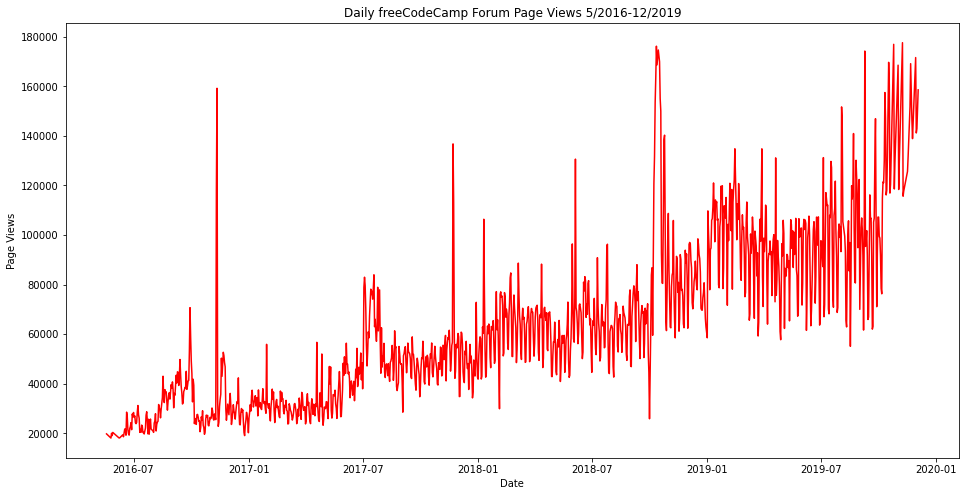

In [4]:
fig, axis = plt.subplots(figsize = (16, 8))

axis.set_xlabel('Date')
axis.set_ylabel('Page Views')
axis.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
axis.plot(df['date'], df['value'], color = 'red')

In [5]:
sort_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df['Months'] = pd.Categorical(df['Months'], categories = sort_order, ordered = True)
df = df.sort_values('Months')

In [6]:
df_bar = df.copy()

averages = {'Years': [], 'Months': [], 'Average per month': []}

for año_actual in df_bar.Years.unique():

    mask_año_actual = (df_bar['Years'] == año_actual)
    df_maskeado_año = df_bar[mask_año_actual]

    for mes_actual in df_maskeado_año['Months'].unique():

        mask_mes_actual = (df_maskeado_año['Months'] == mes_actual)
        df_maskeado_mes = df_maskeado_año[mask_mes_actual]

        promedio_mes = df_maskeado_mes['value'].mean()

        averages['Years'].append(año_actual)
        averages['Months'].append(mes_actual)
        averages['Average per month'].append(promedio_mes)

averages = pd.DataFrame(averages)
averages

,Years,Months,Average per month
0,2017,Jan,32785.161290
1,2017,Feb,31113.071429
2,2017,Mar,29369.096774
3,2017,Apr,30878.733333
4,2017,May,34244.290323
5,2017,Jun,43577.500000
6,2017,Jul,65806.838710
7,2017,Aug,47712.451613
8,2017,Sep,47376.800000
9,2017,Oct,47438.709677


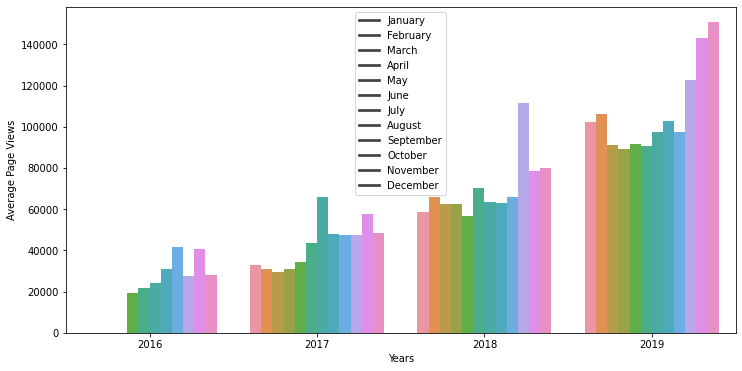

In [24]:
meses = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
                   'September', 'October', 'November', 'December']

fig, axis = plt.subplots(figsize = (12, 6))
g = sb.barplot(data = averages, x = 'Years', y = 'Average per month', hue = 'Months', ax = axis)
g.set(xlabel = 'Years', ylabel = 'Average Page Views')
g.legend(meses)

In [8]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['Year'] = [d.year for d in df_box.date]
df_box['Month'] = [d.strftime('%b') for d in df_box.date]
df_box.rename(columns = {'value': 'Page Views'}, inplace = True)

df_box

,index,Years,Months,Days,date,Page Views,Year,Month
0,242,2017,Jan,6,2017-01-06,37353,2017,Jan
1,972,2019,Jan,6,2019-01-06,94108,2019,Jan
2,971,2019,Jan,5,2019-01-05,77897,2019,Jan
3,970,2019,Jan,4,2019-01-04,94514,2019,Jan
4,969,2019,Jan,3,2019-01-03,100710,2019,Jan
...,...,...,...,...,...,...,...,...
1233,599,2017,Dec,29,2017-12-29,72819,2017,Dec
1234,598,2017,Dec,28,2017-12-28,51018,2017,Dec
1235,597,2017,Dec,27,2017-12-27,43075,2017,Dec
1236,233,2016,Dec,28,2016-12-28,28424,2016,Dec


Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

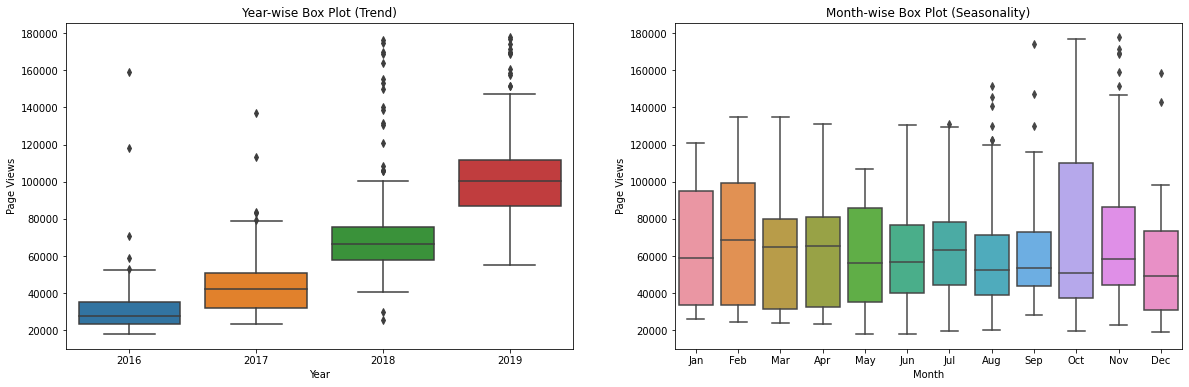

In [9]:
fig, axis = plt.subplots(1, 2, figsize = (20, 6))
a = sb.boxplot(x = df_box['Year'], y = df_box['Page Views'], ax = axis[0])
b = sb.boxplot(x = df_box['Month'], y = df_box['Page Views'], ax = axis[1])
a.set_title('Year-wise Box Plot (Trend)')
b.set_title('Month-wise Box Plot (Seasonality)')
